**<H1>PREDICTING ZOMATO RESTAURANTS RATE</H1>**

**<h1>1.Business Problem<h1>**

**<h2>1.1 Description<h2>**

Restaurants from all over the world can be found here in Bengaluru. From United States to Japan, Russia to Antarctica, you get all type of cuisines here. Delivery, Dine-out, Pubs, Bars, Drinks,Buffet, Desserts you name it and Bengaluru has it. Bengaluru is best place for foodies. The number of restaurant are increasing day by day. Currently which stands at approximately 12,000 restaurants. With such an high number of restaurants. This industry hasn't been saturated yet. And new restaurants are opening every day. However it has become difficult for them to compete with already established restaurants. The key issues that continue to pose a challenge to them include high real estate costs, rising food costs, shortage of quality manpower, fragmented supply chain and over-licensing.

**<h2>1.2 Column Description</h2>**



*   **url** contains the url of the restaurant in the zomato website.

*   **address** contains the address of the restaurant in Bengaluru
 
*   **name** contains the name of the restaurant

*   **online_order** whether online order fecility is available in the restaurant or not

*   **book_table** table book option available or not

*    **rate** contains the overall rating of the restaurant out of 5

*    **votes** contains total number of rating for the restaurant as of the above mentioned date

*   **phone** contains the phone number of the restaurant

*    **location** contains the neighborhood in which the restaurant is located

*   **rest_type** is the type of restaurants like cafe,quick bites etc

*   **dish_liked** dishes people liked in the restaurant

*   **cuisines** food styles, separated by comma

*   **approx_cost(for two people)** contains the approximate cost for meal for two people

*   **reviews_list** list of tuples containing reviews for the restaurant, each tuple

*   **menu_item** contains list of menu available in the restaurant

*   **listed_in(type)** type of meal

*   **listed_in(city)** contains the neighborhood in which the restaurant is listed



**<h2>1.3 Problem Statement</h2>**

The dataset also contains reviews for each of the restaurant which will help in finding overall rating for the place. So we will try to predict rating for particular restaurant.

**<h2>1.4 Machine Learning Formulation</h2>**

Here we suppose to predicted rating of restaurant, so it is basically Regression problem.

**<h2>1.5 Perfomance Metric</h2>**

We will try to reduce Mean Square Error ie MSE as minimum as possible. So it is Regression problem reducing MSE. And Ideal MSE is 0

**<h1>2. Machine Learning Problem</h1>**

In [1]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#importing libraries
import warnings
warnings.filterwarnings("ignore")


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('dark_background')
import re
import tqdm
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.sparse import  hstack,vstack
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import GridSearchCV, train_test_split


In [3]:
#Loading the data

dataset = pd.read_csv("/content/drive/MyDrive/my code/zomato.csv")

In [4]:
dataset.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
dataset.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [6]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [7]:
dataset.shape
#dataset has 51717 rows and 17 columns

(51717, 17)

In [8]:
dataset.columns
#Each column represents a feature of restaurants.

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [9]:
dataset.dtypes
#All columns have data types as object which will be converted as we go further.

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [ ]:
dataset.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

It is observed that dish_liked has over 50% of their data missing.



**Data Cleaning**

In [10]:
#lets remove the columns which are useless columns
dataset=dataset.drop(['url','address','phone','menu_item'],axis=1)

In [11]:
#lets rename some of the column  names to make it easy to understand
dataset=dataset.rename({'approx_cost(for two people)':'avg_2_ppl_cost','listed_in(type)':'listed_type','listed_in(city)':'listed_in_city'},axis=1)

In [12]:
dataset.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,avg_2_ppl_cost,reviews_list,listed_type,listed_in_city
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


In [ ]:
dataset.nunique()

name               8792
online_order          2
book_table            2
rate                 64
votes              2328
location             93
rest_type            93
dish_liked         5271
cuisines           2723
avg_2_ppl_cost       70
reviews_list      22513
listed_type           7
listed_in_city       30
dtype: int64

In [13]:
dataset.shape

(51717, 13)

In [14]:
# Dropping duplicates.

print('Number of Dublicate values in Data Frame = ',dataset.duplicated().sum())
dataset.drop_duplicates(inplace=True)

Number of Dublicate values in Data Frame =  72


In [15]:
#finding features which has null values
nul_features= [x for x in dataset.columns if dataset[x].isnull().sum()>0]
nul_features

['rate', 'location', 'rest_type', 'dish_liked', 'cuisines', 'avg_2_ppl_cost']

In [16]:
#lets find %of null values in above features

for x in nul_features:
    print('{} has {} % missing values'.format(x,np.round(dataset[x].isnull().sum()/len(dataset)*100,4)))



rate has 15.0198 % missing values
location has 0.0407 % missing values
rest_type has 0.4395 % missing values
dish_liked has 54.2531 % missing values
cuisines has 0.0871 % missing values
avg_2_ppl_cost has 0.668 % missing values


These are the percentages of missing values in specified columns.

1. Rate column have 15.023% of missing values it is more as compare to others.
2. location has 0.0407 % missing values
3. rest_type has 0.4395 % missing values
4. dish_liked has 54.2591 % missing values
5. cuisines has 0.0871 % missing values
6. avg_2_ppl_cost has 0.6679 % missing values



**Analysing Each Columns**

In [17]:
#replacing online_order and table_book with binary feature
dataset['online_order'].replace({'Yes':1,'No':0},inplace = True)
dataset['book_table'].replace({'Yes':1,'No':0},inplace = True)


In [18]:
dataset['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [19]:
#removing '/5' from rate column
def split(x):
  return x.split('/')[0]



In [20]:
dataset['rate']=dataset['rate'].astype(str)
dataset['rate']=dataset['rate'].apply(split)
dataset['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: object

In [21]:
dataset['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       'nan', '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4',
       '2.2', '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ',
       '4.1 ', '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ',
       '2.5 ', '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1',
       '2.0', '1.8', '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ',
       '2.4 ', '2.1 ', '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [22]:
dataset.shape

(51645, 13)

So rate column looks better now. Let's remove 'NEW' and '-' and make it look more clean.

In [23]:
dataset.replace('NEW',0,inplace = True)

In [24]:
dataset.replace('-',0,inplace = True)

In [25]:
#change datatype of rate column from object to float

dataset['rate']=dataset['rate'].astype(float)

In [26]:
dataset['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 0. , 2.9, 3.5, nan, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4,
       2.2, 2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [27]:
dataset.shape

(51645, 13)

In [28]:
#sum of null values in rate column
dataset['rate'].isnull().sum()

7757

In [29]:
#filling null values of rate with mean in rate column

dataset['rate'].fillna(dataset['rate'].mean(),inplace=True)

dataset['rate'].isnull().sum()

0

In [30]:
dataset.shape

(51645, 13)

In [31]:
#We have location and city, so to make it clear removing city column
dataset.drop(['listed_in_city'],axis=1,inplace=True)

In [32]:
# avg_2_ppl_Cost column is in object data type we need to convert it to int
dataset['avg_2_ppl_cost'] = dataset['avg_2_ppl_cost'].astype(str)
dataset['avg_2_ppl_cost'] = dataset['avg_2_ppl_cost'].apply(lambda x: x.replace(',','.'))
dataset['avg_2_ppl_cost'] = dataset['avg_2_ppl_cost'].astype(float)

In [33]:
dataset.head()
dataset.shape

(51645, 12)

In [34]:
#lets add another column  with number of cuisines 
def count_cuisines(x):
  num_cuisine = len(str(x).split(','))
  return num_cuisine

In [35]:
#This will be new feature in the data, we can explore this later
dataset['cuisine_count']=dataset['cuisines'].apply(count_cuisines)
dataset.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,avg_2_ppl_cost,reviews_list,listed_type,cuisine_count
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,3
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,3
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,3
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,2
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,2


In [36]:
dataset.isnull().sum()

name                  0
online_order          0
book_table            0
rate                  0
votes                 0
location             21
rest_type           227
dish_liked        28019
cuisines             45
avg_2_ppl_cost      345
reviews_list          0
listed_type           0
cuisine_count         0
dtype: int64

**Visualization**

Text(0.5, 1.0, 'Restaurants that take online_order')

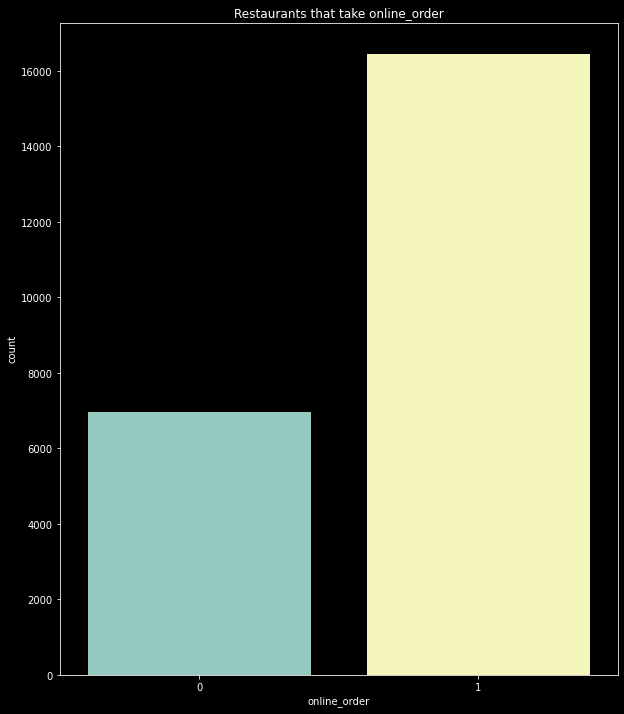

In [ ]:
plt.figure(figsize=(10,12))
sns.countplot(dataset["online_order"])
plt.title("Restaurants that take online_order")

* The number of restaurants that take Online orders are more compared to that of restaurants which dont have online facility.

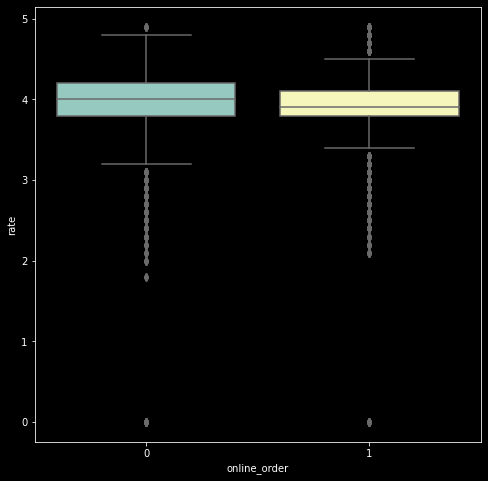

In [ ]:
#online_order vs rating
plt.figure(figsize=(8,8))
sns.boxplot(x='online_order', y='rate',data=dataset)

The restaurants which have online order facility were given more ratings.

Text(0.5, 1.0, 'Types of Restaurants')

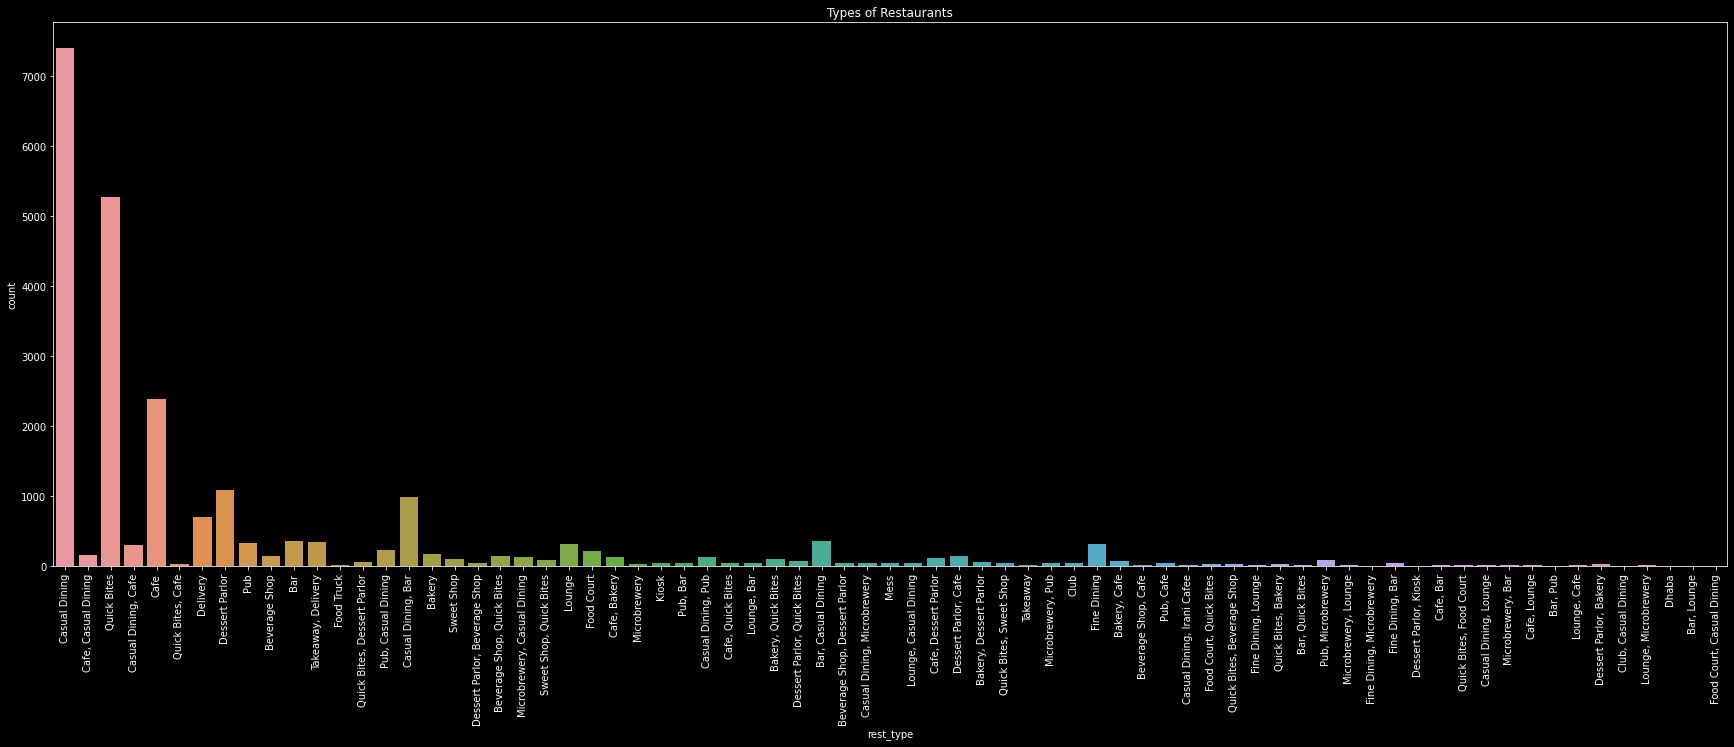

In [ ]:

dataset.location.value_counts()
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.countplot("rest_type",data=dataset)
plt.title("Types of Restaurants")

Bangalore has very much large number of casual dining, quick bites and cafe's type of restaurants as compared to others

Text(0.5, 1.0, 'Restaurants In which tables are booked')

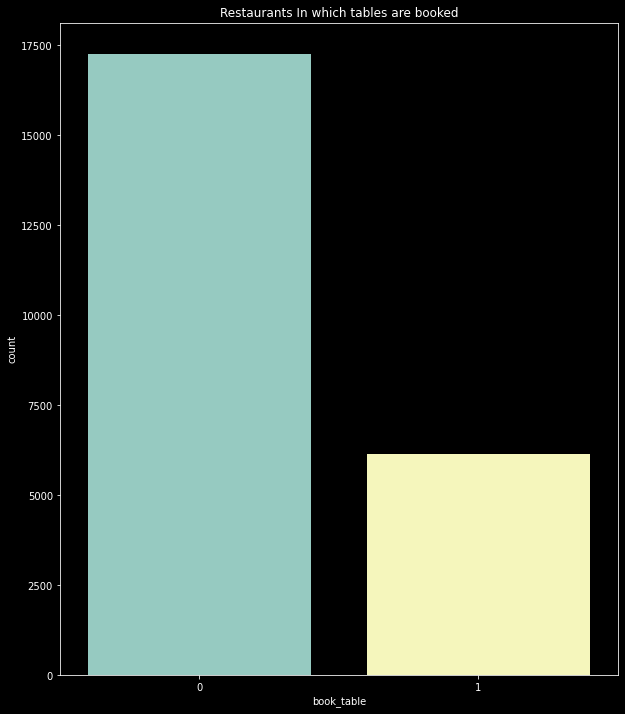

In [ ]:
plt.figure(figsize=(10,12))
sns.countplot(dataset["book_table"])
plt.title("Restaurants In which tables are booked")

The number of restaurants that has facility of table_booking is very less.

Text(0.5, 1.0, '25 most famous restaurants in Bengaluru')

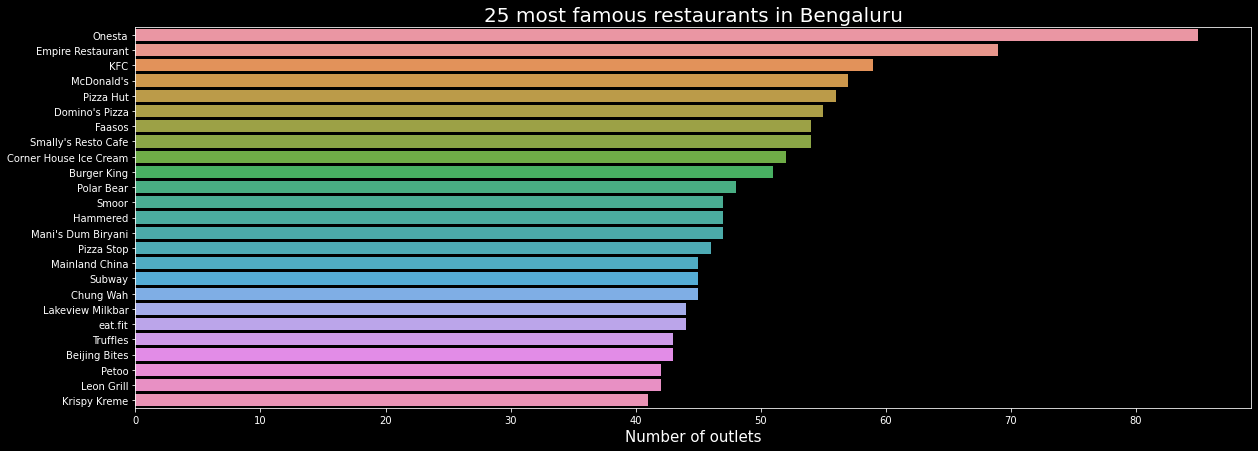

In [ ]:
#famous restaurants chains in Bengaluru
plt.figure(figsize=(20,7))
chains=dataset['name'].value_counts()[:25]
sns.barplot(x=chains,y=chains.index)

plt.xlabel("Number of outlets",size=15)
plt.title("25 most famous restaurants in Bengaluru", size=20)

It is observed that Onesta restaurant appears to be the famous restaurant in Bengaluru, followed by Empire Restaurant and KFC. These are famous 25 restaurants so we cannot say that Chai Point is the least famous.

Text(0, 0.5, 'Number of Votes')

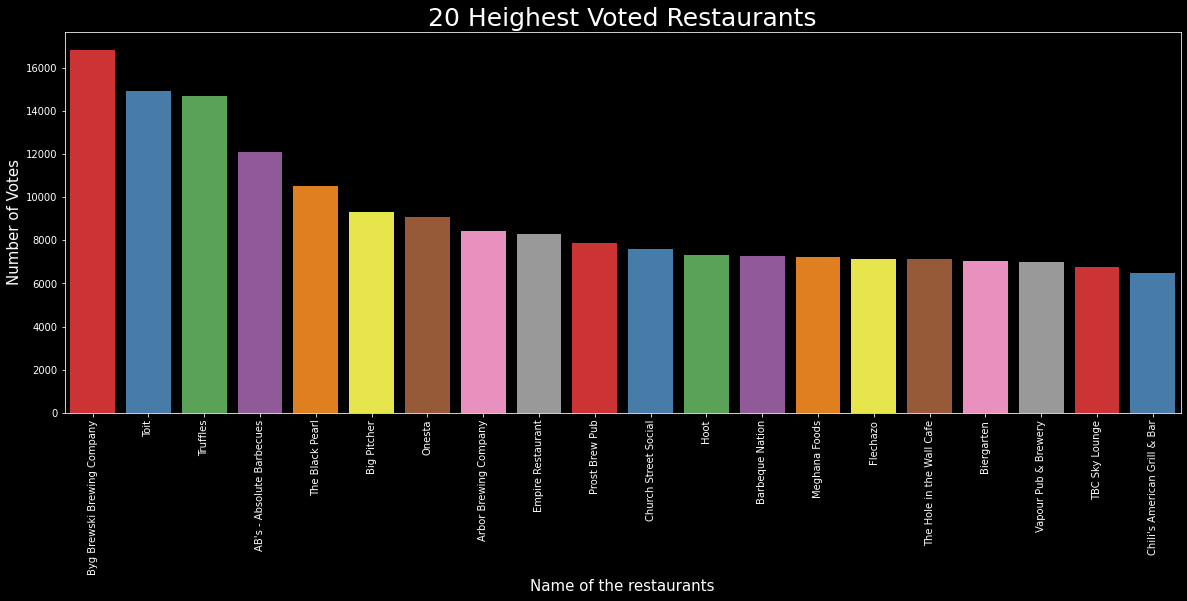

In [ ]:
#20 Most Voted Restaurants in Bengaluru
plt.figure(figsize=(20,7))
x=dataset.groupby('name')['votes'].max().nlargest(20).index

y=dataset.groupby('name')['votes'].max().nlargest(20)
sns.barplot(x,y,palette='Set1')
plt.title("20 Heighest Voted Restaurants",size=25)
plt.xticks(rotation=90)
plt.xlabel("Name of the restaurants",size=15)
plt.ylabel("Number of Votes",size=15)

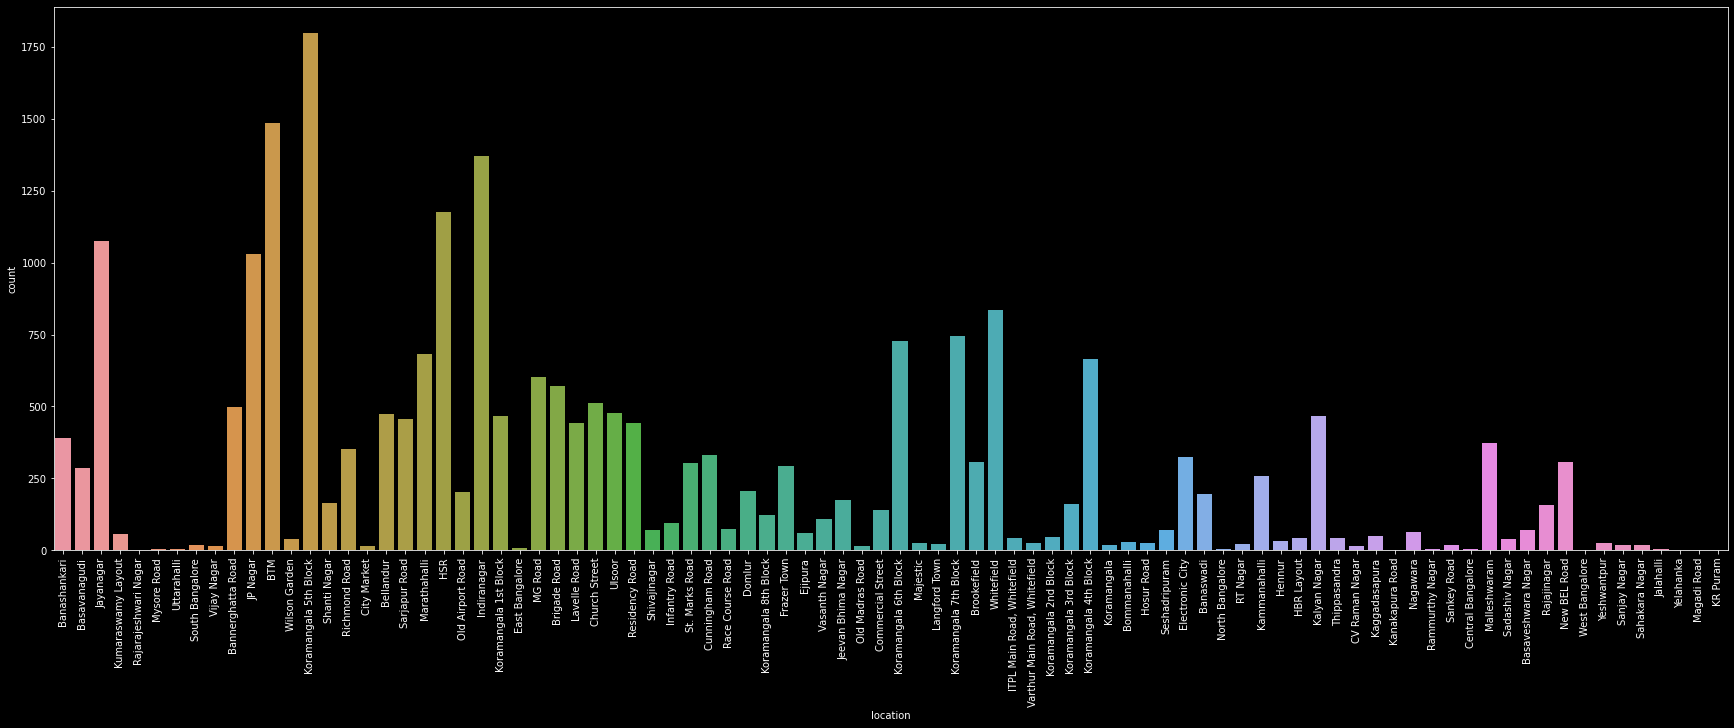

In [ ]:

plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.countplot('location',data=dataset)

BTM Layout has heighest restaurants and next is HSR layout

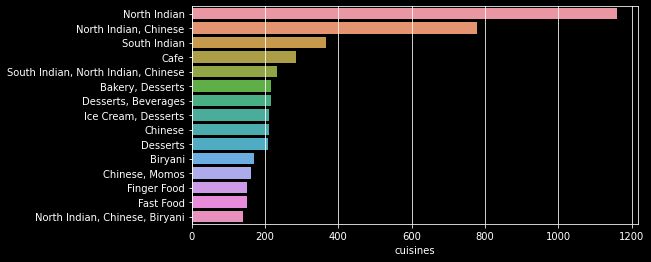

In [ ]:
#top 15 cusines in bengaluru
Cuisine = dataset['cuisines'].value_counts()[:15] # top 15 cuisines
plt.figure(figsize=(8,4))
plt.grid(True)
sns.barplot(Cuisine,Cuisine.index)

Text(0, 0.5, 'Number cuisine_count')

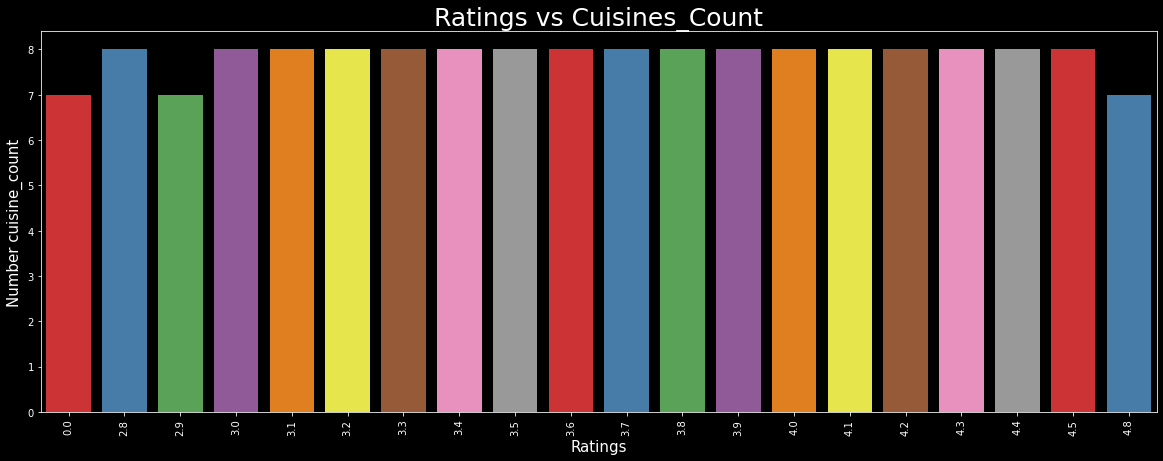

In [ ]:

plt.figure(figsize=(20,7))
x=dataset.groupby('rate')['cuisine_count'].max().nlargest(20).index

y=dataset.groupby('rate')['cuisine_count'].max().nlargest(20)
sns.barplot(x,y,palette='Set1')
plt.title("Ratings vs Cuisines_Count",size=25)
plt.xticks(rotation=90)
plt.xlabel("Ratings",size=15);
plt.ylabel("Number cuisine_count",size=15)

Most of the restaurants with cuisines count of 8 has good ratings.

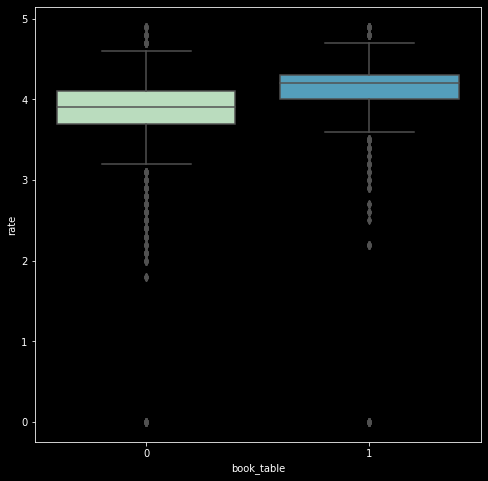

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(x='book_table',y='rate',data=dataset,palette='GnBu')

Ratings given when table booked are heigh when compared to other ratings given by when tables were not booked

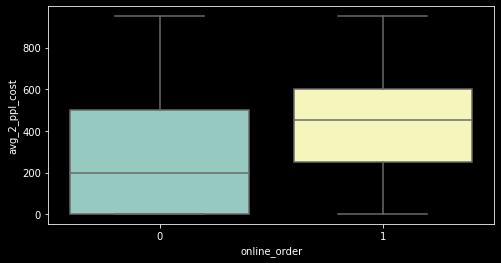

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x='online_order',y='avg_2_ppl_cost',data=dataset)

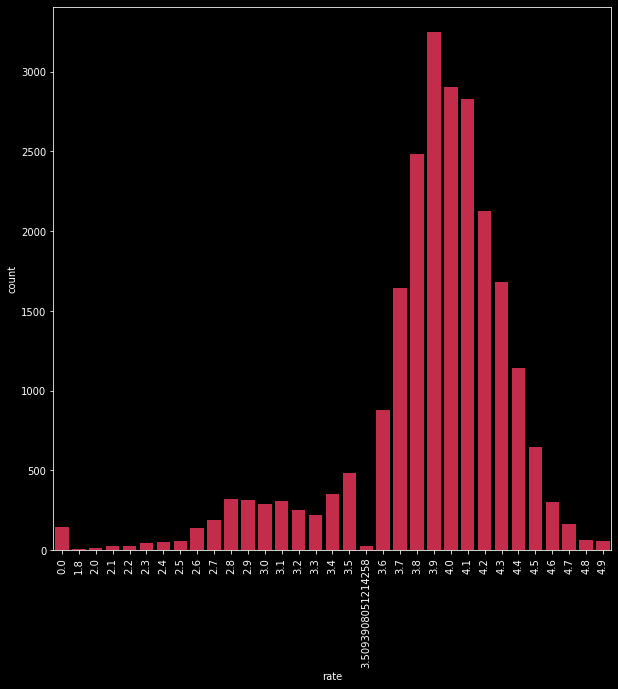

In [ ]:
plt.figure(figsize = (10, 10))
plt.xticks(rotation=90)
sns.countplot(dataset['rate'], color = 'crimson')

In [37]:
dataset.shape

(51645, 13)

Heighest number of restaurants were given with rating of 3.9 and very few restaurants were given with least rating of 1.8

In [38]:
#Removing few more columns which are least important for modelling
dataset=dataset.drop(["name","dish_liked",'location'],axis=1)


In [39]:

#dropping null values from dataset
dataset.dropna(inplace=True)

In [40]:
dataset.shape

(51077, 10)

In [41]:
dataset.head()

,online_order,book_table,rate,votes,rest_type,cuisines,avg_2_ppl_cost,reviews_list,listed_type,cuisine_count
0,1,1,4.1,775,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,3
1,1,0,4.1,787,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,3
2,1,0,3.8,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,3
3,0,0,3.7,88,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,2
4,0,0,3.8,166,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,2


**<h1>Preprocessing the reviews column</h1>**

In [42]:
dataset['reviews_list'].shape

(51077,)

In [43]:
dataset['reviews_list'].dropna(inplace=True)
dataset['reviews_list'].shape

(51077,)

In [44]:
#changing the review data tyoe from object to string
dataset['reviews_list']=dataset['reviews_list'].astype("str")


In [45]:

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"Rated", "", phrase)
    phrase = re.sub(r"RATED", "", phrase)
   
    
    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [46]:
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't","rated", "\n", "n","nan", "x"])



In [47]:
from tqdm import tqdm

# tqdm is for printing the status bar
def preprocessed_data(text):
  preprocessed_text= []
  for sentance in tqdm(text):
    
    sentance = re.sub(r"http\S+", "", sentance)
    
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    # https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_text.append(sentance.strip())
  return preprocessed_text



In [48]:
#preprocessing each column and updating columns with preprocessed values

dataset["reviews_list"]=preprocessed_data(dataset["reviews_list"].values)
dataset["cuisines"]=preprocessed_data(dataset["cuisines"].values)
dataset["rest_type"]=preprocessed_data(dataset["rest_type"].values)

dataset["listed_type"]=preprocessed_data(dataset["listed_type"].values)

100%|██████████| 51077/51077 [00:01<00:00, 49451.56it/s]


In [49]:
dataset.head()

,online_order,book_table,rate,votes,rest_type,cuisines,avg_2_ppl_cost,reviews_list,listed_type,cuisine_count
0,1,1,4.1,775,casual dining,north indian mughlai chinese,800.0,beautiful place dine interiors take back mugha...,buffet,3
1,1,0,4.1,787,casual dining,chinese north indian thai,800.0,dinner family turned good choose suitable ages...,buffet,3
2,1,0,3.8,918,cafe casual dining,cafe mexican italian,800.0,ambience not good enough not pocket friendly c...,buffet,3
3,0,0,3.7,88,quick bites,south indian north indian,300.0,great food proper karnataka style full meals t...,buffet,2
4,0,0,3.8,166,casual dining,north indian rajasthani,600.0,good restaurant neighbourhood buffet system pr...,buffet,2


**<h1>SPLITTING THE DATA INTO TRAIN AND TEST VALUES</h1>**

In [50]:
y= dataset["rate"].values
X=dataset.drop(["rate"],axis=1)

In [51]:
dataset.shape

(51077, 10)

In [73]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.33, stratify=y)

print(X_train.shape)
print(X_test.shape)

(34221, 9)
(16856, 9)


**<h1>ENCODING THE CATEGORICAL FEATURES</h1>**

 **<h2>FEATURIZING THE REVIEW COLUMN</h2>**

**BAG OF WORDS FOR TRAIN VALUES**

In [74]:
data1=X_train["reviews_list"].values
vectorizer=CountVectorizer(min_df=10,max_features=5000)
BOW_train=vectorizer.fit_transform(data1)


print("the shape of out text BOW vectorizer ",BOW_train.shape)



the shape of out text BOW vectorizer  (34221, 5000)


**TFIDF VECTORIZER FOR TRAIN VALUES**

In [75]:
tfidf_vect=TfidfVectorizer(min_df=10,max_features=5000)
text_tfidf=tfidf_vect.fit_transform(data1)

print("the shape of out tfidf  vectorizer ",text_tfidf.shape)

the shape of out tfidf  vectorizer  (34221, 5000)


**AVG W2V FOR TRAIN VALUES**

In [55]:
#lets load glove_vector
#make sure need to have the glove_vectors file
import pickle

with open("/content/drive/MyDrive/my code/glove_vectors",'rb') as f:
  model= pickle.load(f)

  glove_words=set(model.keys())

In [56]:
avg_w2v_vectors=[]  #to store avg_w2v in list
for sentence in tqdm(data1): #for each review from preprocessed reviews
    vector=np.zeros(300)#initialising the vector with zero length
    count_word=0#initialising count_word with valid_vector in each review
    for word in sentence.split(): #each word from review
      if word in glove_words:
        vector+=model[word]
        count_word+=1
    if count_word!=0:
      vector/=count_word
    avg_w2v_vectors.append(vector)


print(len(avg_w2v_vectors[0]))

100%|██████████| 40861/40861 [01:05<00:00, 624.86it/s]

300


**TFIDF AVG W2V FOR TRAIN VAVLUES**

In [ ]:
#computing tfidf vectors

tfidf_model=TfidfVectorizer()
tfidf_model.fit(data1)
model_dict=dict(zip(tfidf_model.get_feature_names(),list(tfidf_model.idf_)))
tfidf_word=set(tfidf_model.get_feature_names())

In [ ]:
#computing tfidf of avg w2v
tfidf_w2v_vectors=[]
for sentence in tqdm(data1):
  vector=np.zeros(300)
  tfidf_weight=0
  for word in sentence.split():
    if (word in glove_words) and (word in tfidf_word):
      vect=model[word]
      tf_idf=model_dict[word]*(sentence.count(word)/len(sentence.split()))
      vector+=(vect*tf_idf)
      tfidf_weight+=tf_idf
  if tfidf_weight!=0:
    vector/= tfidf_weight
  tfidf_w2v_vectors.append(vector)

100%|██████████| 19745/19745 [1:02:11<00:00,  5.29it/s]


**BAG OF WORDS FOR TEST VALUES**

In [58]:
data2=X_test["reviews_list"].values
count_vect=CountVectorizer(min_df=10,max_features=5000)
BOW_test=count_vect.fit_transform(data2)



print("the shape of out text BOW vectorizer ",BOW_test.shape)


the shape of out text BOW vectorizer  (10216, 5000)


In [72]:
print(type(data2))

<class 'numpy.ndarray'>


**TFIDF VECTORIZER FOR TEST VALUES**

In [59]:
tfidf_vect=TfidfVectorizer(min_df=10,max_features=5000)
text_tfidf_test=tfidf_vect.fit_transform(data2)

print("the shape of out tfidf  vectorizer ",text_tfidf_test.shape)

the shape of out tfidf  vectorizer  (10216, 5000)


**AVG W2V FOR TEST VALUES**

In [60]:
avg_w2v_vectors_test=[]  #to store avg_w2v in list
for sentence in tqdm(data2): #for each review from preprocessed reviews
    vector=np.zeros(300)#initialising the vector with zero length
    count_word=0#initialising count_word with valid_vector in each review
    for word in sentence.split(): #each word from review
      if word in glove_words:
        vector+=model[word]
        count_word+=1
    if count_word!=0:
      vector/=count_word
    avg_w2v_vectors_test.append(vector)
print(len(avg_w2v_vectors_test))
print(len(avg_w2v_vectors_test[0]))

100%|██████████| 10216/10216 [00:15<00:00, 652.03it/s]

10216
300


**TFIDF AVG W2V FOR TEST VAVLUES**

In [ ]:
#computing tfidf vectors

tfidf_model=TfidfVectorizer(max_features=5000)
tfidf_model.fit(data2)
model_dict=dict(zip(tfidf_model.get_feature_names(),list(tfidf_model.idf_)))
tfidf_word=set(tfidf_model.get_feature_names())

In [ ]:
#computing tfidf of avg w2v for test values
tfidf_w2v_vectors_test=[]
for sentence in tqdm(data2):
  vector=np.zeros(300)
  tfidf_weight=0
  for word in sentence.split():
    if (word in glove_words) and (word in tfidf_word):
      vect=model[word]
      tf_idf=model_dict[word]*(sentence.count(word)/len(sentence.split()))
      vector+=(vect*tf_idf)
      tfidf_weight+=tf_idf
  if tfidf_weight!=0:
    vector/= tfidf_weight
  tfidf_w2v_vectors_test.append(vector)

100%|██████████| 4937/4937 [15:03<00:00,  5.47it/s]


**Feature: Rest_type**

In [61]:
data3_train=X_train["rest_type"].values
data3_test=X_test["rest_type"].values

vectorizer=CountVectorizer()
vectorizer.fit(X_train["rest_type"].values)


X_train_rest_type= vectorizer.transform(data3_train)
X_test_rest_type= vectorizer.transform(data3_test)

print(X_train_rest_type.shape, y_train.shape)
print(X_test_rest_type.shape, y_test.shape)

(40861, 31) (40861,)
(10216, 31) (10216,)


**Feature: Cuisines**

In [62]:
vectorizer=CountVectorizer()
vectorizer.fit(X_train["cuisines"].values)


X_train_cuisines= vectorizer.transform(X_train["cuisines"].values)
X_test_cuisines= vectorizer.transform(X_test["cuisines"].values)

print(X_train_cuisines.shape, y_train.shape)
print(X_test_cuisines.shape, y_test.shape)

(40861, 113) (40861,)
(10216, 113) (10216,)


**Feature : listed_type**

In [63]:
vectorizer=CountVectorizer()
vectorizer.fit(X_train["listed_type"].values)


X_train_listed_type= vectorizer.transform(X_train["listed_type"].values)
X_test_listed_type= vectorizer.transform(X_test["listed_type"].values)

print(X_train_listed_type.shape, y_train.shape)
print(X_test_listed_type.shape, y_test.shape)

(40861, 9) (40861,)
(10216, 9) (10216,)


**<h1>ENCODING THE NUMERICAL FEATURES</h1>**

**Feature: Votes**

In [64]:
normalizer=Normalizer()
normalizer.fit(X_train["votes"].values.reshape(1,-1))

X_train_votes= normalizer.transform(X_train["votes"].values.reshape(-1,1))
X_test_votes= normalizer.transform(X_test["votes"].values.reshape(-1,1))

print(X_train_votes.shape, y_train.shape)
print(X_test_votes.shape, y_test.shape)

(40861, 1) (40861,)
(10216, 1) (10216,)


**Feature: avg_2_ppl_cost**

In [65]:
normalizer=Normalizer()
normalizer.fit(X_train["avg_2_ppl_cost"].values.reshape(1,-1))

X_train_avg_2_ppl_cost= normalizer.transform(X_train["avg_2_ppl_cost"].values.reshape(-1,1))
X_test_avg_2_ppl_cost= normalizer.transform(X_test["avg_2_ppl_cost"].values.reshape(-1,1))

print(X_train_avg_2_ppl_cost.shape, y_train.shape)
print(X_test_avg_2_ppl_cost.shape, y_test.shape)

(40861, 1) (40861,)
(10216, 1) (10216,)


**Feature: cuisine_count**

In [66]:
normalizer=Normalizer()
normalizer.fit(X_train["cuisine_count"].values.reshape(1,-1))

X_train_cuisine_count= normalizer.transform(X_train["cuisine_count"].values.reshape(-1,1))
X_test_cuisine_count= normalizer.transform(X_test["cuisine_count"].values.reshape(-1,1))

print(X_train_cuisine_count.shape, y_train.shape)
print(X_test_cuisine_count.shape, y_test.shape)

(40861, 1) (40861,)
(10216, 1) (10216,)


**Feature: online_order**

In [67]:
normalizer=Normalizer()
normalizer.fit(X_train["online_order"].values.reshape(1,-1))

X_train_online_order= normalizer.transform(X_train["online_order"].values.reshape(-1,1))
X_test_online_order= normalizer.transform(X_test["online_order"].values.reshape(-1,1))

print(X_train_online_order.shape, y_train.shape)
print(X_test_online_order.shape, y_test.shape)

(40861, 1) (40861,)
(10216, 1) (10216,)


**Feature: book_table**

In [68]:
normalizer=Normalizer()
normalizer.fit(X_train["book_table"].values.reshape(1,-1))

X_train_book_table= normalizer.transform(X_train["book_table"].values.reshape(-1,1))
X_test_book_table= normalizer.transform(X_test["book_table"].values.reshape(-1,1))

print(X_train_book_table.shape, y_train.shape)
print(X_test_book_table.shape, y_test.shape)

(40861, 1) (40861,)
(10216, 1) (10216,)


**<h3>CONCATINATING ALL THE FEATURES WITH BOW VECTORIZER</h3>**

In [69]:
X_train_con=hstack((BOW_train,X_train_rest_type,X_train_cuisines,X_train_listed_type,X_train_votes,X_train_avg_2_ppl_cost,X_train_cuisine_count)).tocsr()

X_test_con=hstack((BOW_test,X_test_rest_type,X_test_cuisines,X_test_listed_type,X_test_votes,X_test_avg_2_ppl_cost,X_test_cuisine_count)).tocsr()

print(X_train_con.shape)
print(X_test_con.shape)

(40861, 5156)
(10216, 5156)


**<h1>MODELLING</h1>**

**Modelling with all features and BOW Vectorizer**

In [70]:
#computing the  MSE for LinearRegression Model
model_1=LinearRegression()

model_1.fit(X_train_con,y_train)
model_1_train_pred=model_1.predict(X_train_con)  #Predictng for train values
model_1_test_pred=model_1.predict(X_test_con)  #predicting for test values


print("The train_MSE  for LR model",mean_squared_error(y_train,model_1_train_pred))
print("The test_MSE for LR model",mean_squared_error(y_test,model_1_test_pred))

The train_MSE  for LR model 0.44740395683265566
The test_MSE for LR model 39.9660123818832


In [71]:
##computing the  MSE for RandomForestRegression Model
model_2=RandomForestRegressor(n_jobs=-1)
model_2.fit(X_train_con,y_train)

model_2_train_pred=model_2.predict(X_train_con)
model_2_test_pred=model_2.predict(X_test_con)

print("The train_MSE  for RF model",mean_squared_error(y_train,model_2_train_pred))
print("The test_MSE for RF model",mean_squared_error(y_test,model_2_test_pred))

The train_MSE  for RF model 0.15205635432676054
The test_MSE for RF model 0.5635541948546944


In [ ]:
##computing the  MSE for DecisionTreeRegressor Model
model_3=DecisionTreeRegressor()
model_3.fit(X_train_con,y_train)
model_3_train_pred=model_3.predict(X_train_con)
model_3_test_pred=model_3.predict(X_test_con)


print("The train_MSE  for DT model",mean_squared_error(y_train,model_3_train_pred))
print("The test_MSE for DT model",mean_squared_error(y_test,model_3_test_pred))

The train_MSE  for DT model 0.13623921666773695
The test_MSE for DT model 0.8278623746933984


In [ ]:
##computing  MSE for XGBRegressor Model
model_4=XGBRegressor()
model_4.fit(X_train_con,y_train)
model_4_train_pred=model_4.predict(X_train_con)
model_4_test_pred=model_4.predict(X_test_con)

print("The train_MSE  for XGB model",mean_squared_error(y_train,model_4_train_pred))
print("The test_MSE for XGB model",mean_squared_error(y_test,model_4_test_pred))

[09:06:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
The train_MSE  for XGB model 0.4121757132152939
The test_MSE for XGB model 0.6086051446246411


In [ ]:
#computing the  MSE for LGBMRegressor Model
model_5=LGBMRegressor()  
model_5.fit(X_train_con,y_train)   
model_5_train_pred=model_5.predict(X_train_con)  #Predictng for train values
model_5_test_pred=model_5.predict(X_test_con)  #predicting for test values



print("The train_MSE  for LGBM model",mean_squared_error(y_train,model_5_train_pred))
print("The test_MSE for LGBM model",mean_squared_error(y_test,model_5_test_pred))

The train_MSE  for LGBM model 0.30948127932609587
The test_MSE for LGBM model 0.6048655738938957


In [ ]:
##computing the  MSE for KNeighborsRegressor Model

model_6=KNeighborsRegressor()
model_6.fit(X_train_con,y_train)
model_6_train_pred=model_6.predict(X_train_con)
model_6_test_pred=model_6.predict(X_test_con)

print("The train_MSE  for KNN model",mean_squared_error(y_train,model_6_train_pred))
print("The test_MSE for KNN model",mean_squared_error(y_test,model_6_test_pred))

The train_MSE  for KNN model 0.32109091554318875
The test_MSE for KNN model 0.8436037438680987


**OBSERVATION:**

After training all the models with **BOW** vectorizer the MSE of LGBMRegressor is 
0.60486 which less compared to other models.

**</h1>CONCATINATING ALL THE FEATURES WITH TFIDF VECTORIZER</h1>**

In [ ]:
X_train_con=hstack((text_tfidf,X_train_online_order,X_train_book_table,X_train_rest_type,X_train_cuisines,X_train_listed_type,X_train_votes,X_train_avg_2_ppl_cost,X_train_cuisine_count)).tocsr()

X_test_con=hstack((text_tfidf_test,X_test_online_order,X_test_book_table,X_test_rest_type,X_test_cuisines,X_test_listed_type,X_test_votes,X_test_avg_2_ppl_cost,X_test_cuisine_count)).tocsr()

print(X_train_con.shape)
print(X_test_con.shape)

(34125, 5157)
(16808, 5157)


**Modelling with all features and TFIDF Vectorizer**

In [ ]:
#computing the  MSE for LinearRegression Model
model_1_tfidf=LinearRegression()

model_1_tfidf.fit(X_train_con,y_train)
model_1_train_pred=model_1_tfidf.predict(X_train_con)  #Predictng for train values
model_1_test_pred=model_1_tfidf.predict(X_test_con)  #predicting for test values


print("The train_MSE  for LR model",mean_squared_error(y_train,model_1_train_pred))
print("The test_MSE for LR model",mean_squared_error(y_test,model_1_test_pred))

The train_MSE  for LR model 0.3517622753067507
The test_MSE for LR model 1.564777669320027


In [ ]:
##computing the  MSE for RandomForestRegression Model
model_2_tfidf=RandomForestRegressor(n_jobs=-1)
model_2_tfidf.fit(X_train_con,y_train)

model_2_train_pred=model_2_tfidf.predict(X_train_con)
model_2_test_pred=model_2_tfidf.predict(X_test_con)

print("The train_MSE  for RF model",mean_squared_error(y_train,model_2_train_pred))
print("The test_MSE for RF model",mean_squared_error(y_test,model_2_test_pred))

The train_MSE  for RF model 0.13090663434211358
The test_MSE for RF model 0.5015046638800511


In [ ]:
##computing the  MSE for DecisionTreeRegressor Model
model_3_tfidf=DecisionTreeRegressor()
model_3_tfidf.fit(X_train_con,y_train)
model_3_train_pred=model_3_tfidf.predict(X_train_con)
model_3_test_pred=model_3_tfidf.predict(X_test_con)


print("The train_MSE  for DT model",mean_squared_error(y_train,model_3_train_pred))
print("The test_MSE for DT model",mean_squared_error(y_test,model_3_test_pred))

The train_MSE  for DT model 0.11875366968009617
The test_MSE for DT model 0.6522808643789193


In [ ]:
##computing  MSE for XGBRegressor Model
model_4_tfidf=XGBRegressor()
model_4_tfidf.fit(X_train_con,y_train)
model_4_train_pred=model_4_tfidf.predict(X_train_con)
model_4_test_pred=model_4_tfidf.predict(X_test_con)

print("The train_MSE  for XGB model",mean_squared_error(y_train,model_4_train_pred))
print("The test_MSE for XGB model",mean_squared_error(y_test,model_4_test_pred))

[11:43:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
The train_MSE  for XGB model 0.39817304178054064
The test_MSE for XGB model 0.5454553661901721


In [ ]:
#computing the  MSE for LGBMRegressor Model
model_5_tfidf=LGBMRegressor()  
model_5_tfidf.fit(X_train_con,y_train)   
model_5_train_pred=model_5_tfidf.predict(X_train_con)  #Predictng for train values
model_5_test_pred=model_5_tfidf.predict(X_test_con)  #predicting for test values



print("The train_MSE  for LGBM model",mean_squared_error(y_train,model_5_train_pred))
print("The test_MSE for LGBM model",mean_squared_error(y_test,model_5_test_pred))

The train_MSE  for LGBM model 0.2811098454474943
The test_MSE for LGBM model 0.514695951413258


In [ ]:
##computing the  MSE for KNeighborsRegressor Model

model_6_tfidf=KNeighborsRegressor()
model_6_tfidf.fit(X_train_con,y_train)
model_6_train_pred=model_6_tfidf.predict(X_train_con)
model_6_test_pred=model_6_tfidf.predict(X_test_con)

print("The train_MSE  for KNN model",mean_squared_error(y_train,model_6_train_pred))
print("The test_MSE for KNN model",mean_squared_error(y_test,model_6_test_pred))

The train_MSE  for KNN model 0.2786145597329539
The test_MSE for KNN model 0.4816838095744919


**OBSERVATION:**

After training all the models with **TFIDF** vectorizer the MSE of test values of KNNRegressor is 0.48168 which less compared to other models.

And the MSE values have improved a lot using **TFIDF** Vectorizer as compared to BOW.

**</h1>CONCATINATING ALL THE FEATURES WITH AVG W2V VECTORIZER</h1>**

In [ ]:
X_train_con=hstack((avg_w2v_vectors,X_train_online_order,X_train_book_table,X_train_rest_type,X_train_cuisines,X_train_listed_type,X_train_votes,X_train_avg_2_ppl_cost,X_train_cuisine_count)).tocsr()

X_test_con=hstack((avg_w2v_vectors_test,X_test_online_order,X_test_book_table,X_test_rest_type,X_test_cuisines,X_test_listed_type,X_test_votes,X_test_avg_2_ppl_cost,X_test_cuisine_count)).tocsr()

print(X_train_con.shape)
print(X_test_con.shape)

(19745, 456)
(4937, 456)


**Modelling with all features and Avg W2V Vectorizer**

In [ ]:
#computing the  MSE for LinearRegression Model
model_1_w2v=LinearRegression()

model_1_w2v.fit(X_train_con,y_train)
model_1_train_pred=model_1_w2v.predict(X_train_con)  #Predictng for train values
model_1_test_pred=model_1_w2v.predict(X_test_con)  #predicting for test values


print("The train_MSE  for LR model",mean_squared_error(y_train,model_1_train_pred))
print("The test_MSE for LR model",mean_squared_error(y_test,model_1_test_pred))

The train_MSE  for LR model 0.5455140174952826
The test_MSE for LR model 0.5663642650885957


In [ ]:
##computing the  MSE for RandomForestRegression Model
model_2_w2v=RandomForestRegressor(n_jobs=-1)
model_2_w2v.fit(X_train_con,y_train)

model_2_train_pred=model_2_w2v.predict(X_train_con)
model_2_test_pred=model_2_w2v.predict(X_test_con)

print("The train_MSE  for RF model",mean_squared_error(y_train,model_2_train_pred))
print("The test_MSE for RF model",mean_squared_error(y_test,model_2_test_pred))

The train_MSE  for RF model 0.13636856229637795
The test_MSE for RF model 0.2904982586774561


In [ ]:
##computing the  MSE for DecisionTreeRegressor Model
model_3_w2v=DecisionTreeRegressor()
model_3_w2v.fit(X_train_con,y_train)
model_3_train_pred=model_3_w2v.predict(X_train_con)
model_3_test_pred=model_3_w2v.predict(X_test_con)


print("The train_MSE  for DT model",mean_squared_error(y_train,model_3_train_pred))
print("The test_MSE for DT model",mean_squared_error(y_test,model_3_test_pred))

The train_MSE  for DT model 0.11620415035720472
The test_MSE for DT model 0.36393609906606106


In [ ]:
##computing  MSE for XGBRegressor Model
model_4_w2v=XGBRegressor()
model_4_w2v.fit(X_train_con,y_train)
model_4_train_pred=model_4_w2v.predict(X_train_con)
model_4_test_pred=model_4_w2v.predict(X_test_con)

print("The train_MSE  for XGB model",mean_squared_error(y_train,model_4_train_pred))
print("The test_MSE for XGB model",mean_squared_error(y_test,model_4_test_pred))

[10:25:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
The train_MSE  for XGB model 0.4285130467004867
The test_MSE for XGB model 0.46131364455504226


In [ ]:
#computing the  MSE for LGBMRegressor Model
model_5_w2v=LGBMRegressor()  
model_5_w2v.fit(X_train_con,y_train)   
model_5_train_pred=model_5_w2v.predict(X_train_con)  #Predictng for train values
model_5_test_pred=model_5_w2v.predict(X_test_con)  #predicting for test values



print("The train_MSE  for LGBM model",mean_squared_error(y_train,model_5_train_pred))
print("The test_MSE for LGBM model",mean_squared_error(y_test,model_5_test_pred))

The train_MSE  for LGBM model 0.27428015655398535
The test_MSE for LGBM model 0.3505830716651148


In [ ]:
##computing the  MSE for KNeighborsRegressor Model

model_6_w2v=KNeighborsRegressor()
model_6_w2v.fit(X_train_con,y_train)
model_6_train_pred=model_6_w2v.predict(X_train_con)
model_6_test_pred=model_6_w2v.predict(X_test_con)

print("The train_MSE  for KNN model",mean_squared_error(y_train,model_6_train_pred))
print("The test_MSE for KNN model",mean_squared_error(y_test,model_6_test_pred))

The train_MSE  for KNN model 0.35821001491057275
The test_MSE for KNN model 0.5244821360689027


**OBSERVATION:**

After training all the models with **Avg W2V** vectorizer the MSE of test values of RandomForestRegressor is 0.2904 which less compared to other models.

And the MSE values have improved a lot using **Avg W2V** Vectorizer as compared to BOW and TFIDF Vectorizer.

As RandomForest has got MSE of 0.2566 with Avg W2V, so lets do hyperparameter tuning and check for MSE.

**</h1>CONCATINATING ALL THE FEATURES WITH TFIDF AVG W2V VECTORIZER</h1>**

In [ ]:
X_train_con=hstack((tfidf_w2v_vectors,X_train_online_order,X_train_book_table,X_train_rest_type,X_train_cuisines,X_train_listed_type,X_train_votes,X_train_avg_2_ppl_cost,X_train_cuisine_count)).tocsr()

X_test_con=hstack((tfidf_w2v_vectors_test,X_test_online_order,X_test_book_table,X_test_rest_type,X_test_cuisines,X_test_listed_type,X_test_votes,X_test_avg_2_ppl_cost,X_test_cuisine_count)).tocsr()

print(X_train_con.shape)
print(X_test_con.shape)

(19745, 456)
(4937, 456)


In [ ]:
#computing the  MSE for LinearRegression Model
model_tfidf_w2v=LinearRegression()

model_tfidf_w2v.fit(X_train_con,y_train)
model_1_train_pred=model_tfidf_w2v.predict(X_train_con)  #Predictng for train values
model_1_test_pred=model_tfidf_w2v.predict(X_test_con)  #predicting for test values


print("The train_MSE  for LR model",mean_squared_error(y_train,model_1_train_pred))
print("The test_MSE for LR model",mean_squared_error(y_test,model_1_test_pred))

The train_MSE  for LR model 0.5461216345010808
The test_MSE for LR model 0.5615395067692701


In [ ]:
##computing the  MSE for RandomForestRegression Model
model_2_tfidf_w2v=RandomForestRegressor(n_jobs=-1)
model_2_tfidf_w2v.fit(X_train_con,y_train)

model_2_train_pred=model_2_tfidf_w2v.predict(X_train_con)
model_2_test_pred=model_2_tfidf_w2v.predict(X_test_con)

print("The train_MSE  for RF model",mean_squared_error(y_train,model_2_train_pred))
print("The test_MSE for RF model",mean_squared_error(y_test,model_2_test_pred))

The train_MSE  for RF model 0.13774951715197706
The test_MSE for RF model 0.3008753454149694


In [ ]:
##computing the  MSE for DecisionTreeRegressor Model
model_3_tfidf_w2v=DecisionTreeRegressor()
model_3_tfidf_w2v.fit(X_train_con,y_train)
model_3_train_pred=model_3_tfidf_w2v.predict(X_train_con)
model_3_test_pred=model_3_tfidf_w2v.predict(X_test_con)


print("The train_MSE  for DT model",mean_squared_error(y_train,model_3_train_pred))
print("The test_MSE for DT model",mean_squared_error(y_test,model_3_test_pred))

The train_MSE  for DT model 0.11813440798727433
The test_MSE for DT model 0.3848758898612835


In [ ]:
##computing  MSE for XGBRegressor Model
model_4_tfidf_w2v=XGBRegressor(n_estimators=1000,n_jobs=-1)
model_4_tfidf_w2v.fit(X_train_con,y_train)
model_4_train_pred=model_4_tfidf_w2v.predict(X_train_con)
model_4_test_pred=model_4_tfidf_w2v.predict(X_test_con)

print("The train_MSE  for XGB model",mean_squared_error(y_train,model_4_train_pred))
print("The test_MSE for XGB model",mean_squared_error(y_test,model_4_test_pred))
print("The test_RMSE for XGB model",np.sqrt(mean_squared_error(y_test,model_4_test_pred)))

[05:39:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
The train_MSE  for XGB model 0.2910171321784879
The test_MSE for XGB model 0.3798788518360486
The test_RMSE for XGB model 0.6163431283271101


In [ ]:
#computing the  MSE for LGBMRegressor Model
model_5_tfidf_w2v=LGBMRegressor(max_depth=3)  
model_5_tfidf_w2v.fit(X_train_con,y_train)   
model_5_train_pred=model_5_tfidf_w2v.predict(X_train_con)  #Predictng for train values
model_5_test_pred=model_5_tfidf_w2v.predict(X_test_con)  #predicting for test values



print("The train_MSE  for LGBM model",mean_squared_error(y_train,model_5_train_pred))
print("The test_MSE for LGBM model",mean_squared_error(y_test,model_5_test_pred))
print("The test_MSE for LGBM model",np.sqrt(mean_squared_error(y_test,model_5_test_pred)))

The train_MSE  for LGBM model 0.4456841050853241
The test_MSE for LGBM model 0.4769071919639327
The test_MSE for LGBM model 0.6905846740001784


In [ ]:
##computing the  MSE for KNeighborsRegressor Model

model_6_tfidf_w2v=KNeighborsRegressor()
model_6_tfidf_w2v.fit(X_train_con,y_train)
model_6_train_pred=model_6_tfidf_w2v.predict(X_train_con)
model_6_test_pred=model_6_tfidf_w2v.predict(X_test_con)

print("The train_MSE  for KNN model",mean_squared_error(y_train,model_6_train_pred))
print("The test_MSE for KNN model",mean_squared_error(y_test,model_6_test_pred))
print("The test_MSE for knn model",np.sqrt(mean_squared_error(y_test,model_6_test_pred)))

The train_MSE  for KNN model 0.3348342638908454
The test_MSE for KNN model 0.49453075970412164
The test_MSE for knn model 0.7032288103484681


**HyperParameter Tuning with RandomForestRegressor**

In [ ]:
param={
    "n_estimators":[200,350,600,700,900,1000],
    
    }

clf=RandomForestRegressor(n_jobs=-1)
clf1=RandomizedSearchCV(estimator = clf, param_distributions = param, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)
clf1.fit(X_train_con,y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


In [ ]:
best_model=clf1.best_estimator_

In [ ]:
best_model.fit(X_train_con,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:


best_model_train_pred=best_model.predict(X_train_con)
best_model_test_pred=best_model.predict(X_test_con)


print("The train_MSE  for Best model",mean_squared_error(y_train,best_model_train_pred))
print("The test_MSE for best model",mean_squared_error(y_test,best_model_test_pred))


The train_MSE  for Best model 0.4037263316599833
The test_MSE for best model 0.4448553568508479


In [ ]:
 from sklearn.metrics import mean_absolute_error
 from sklearn.metrics import r2_score
 print("Absolute Mean error is",mean_absolute_error(y_test, best_model_test_pred))
 print("R2 score : %.2f" % r2_score(y_test,best_model_test_pred))

Absolute Mean error is 0.4311885768908921
R2 score : 0.47
